In [39]:
##Import bibliotek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [47]:
# Ustawienie stylu dla wykresów
plt.style.use('seaborn-v0_8-pastel')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [43]:
## Załadowanie datasetu, wstępna eksploracja

df = pd.read_csv(r'C:\Users\ematrejek\Desktop\raport1\Student_Performance.csv')
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


In [45]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [46]:
##sprawdzanie braków danych
missing_summary = df.isnull().sum()
missing_summary

##nie ma brakujących wartości

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

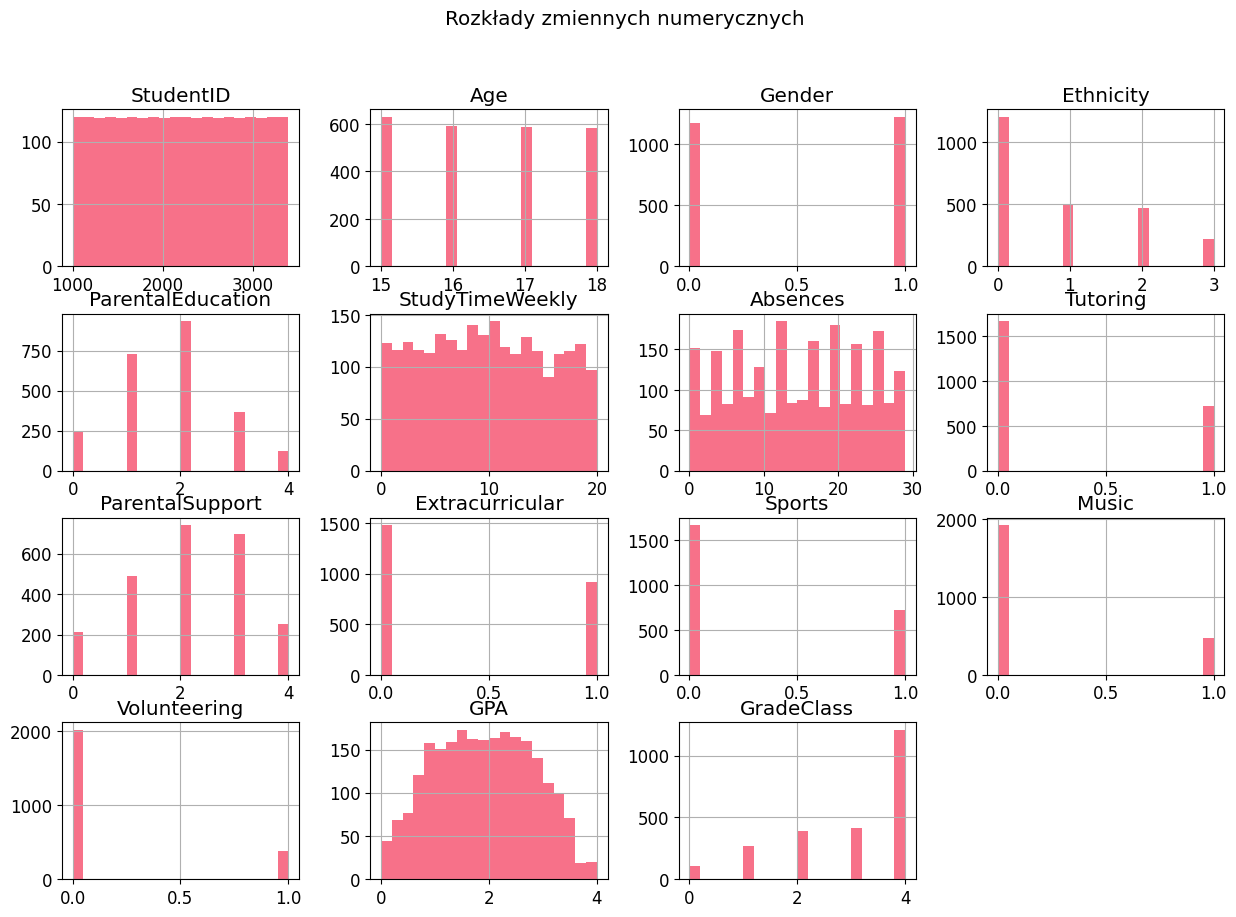

In [35]:
##histogramy dla zmiennych

df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Rozkłady zmiennych numerycznych')
plt.show()

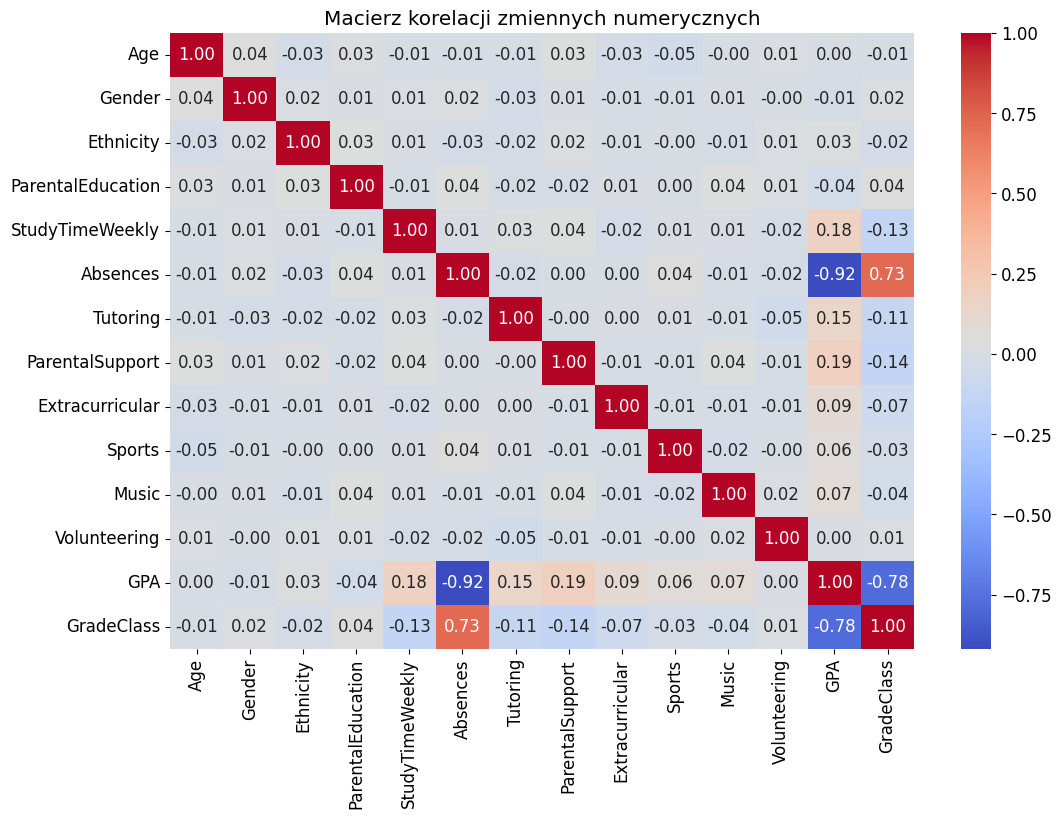

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654


In [ ]:
##macier korelacji

correlation_matrix = df.drop(columns=['StudentID']).corr()

# Wizualizacja macierzy korelacji przy użyciu Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Macierz korelacji zmiennych numerycznych')
plt.show()

correlation_matrix

In [48]:
## zdefiniowanie funkcji do obliczania efektów

def calculate_effects(df, treatment_var, outcome_var='GPA'):
    """
    Funkcja obliczająca efekty przyczynowe dla danej zmiennej treatment - tak aby było uniwersalnie
    """
    T = df[treatment_var]
    Y = df[outcome_var]
    
    Y1 = Y[T == 1]
    Y0 = Y[T == 0]
    
    n_treated = sum(T == 1)
    n_control = sum(T == 0)
    
    ##zmienne kontrolne do matchingu
    control_vars = ['Age', 'ParentalEducation', 'StudyTimeWeekly', 'Absences']
    X = df[control_vars]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    ##matching dla ATT
    nbrs = NearestNeighbors(n_neighbors=1).fit(X_scaled[T == 0])
    distances, indices = nbrs.kneighbors(X_scaled[T == 1])
    matched_control = Y0.iloc[indices.flatten()]
    
    ##matching dla ATC
    nbrs_control = NearestNeighbors(n_neighbors=1).fit(X_scaled[T == 1])
    distances_control, indices_control = nbrs_control.kneighbors(X_scaled[T == 0])
    matched_treated = Y1.iloc[indices_control.flatten()]
    
    ##obliczenie efektów
    ate = Y1.mean() - Y0.mean()
    att = Y1.mean() - matched_control.mean()
    atc = matched_treated.mean() - Y0.mean()
    
    ##błędy standardowe
    var_treated = Y1.var()
    var_control = Y0.var()
    se_ate = np.sqrt(var_treated/n_treated + var_control/n_control)
    se_att = np.sqrt(var_treated/n_treated + var_control/len(matched_control))
    se_atc = np.sqrt(var_treated/len(matched_treated) + var_control/n_control)
    
    ##przedziały ufności
    ci_ate = (ate - 1.96 * se_ate, ate + 1.96 * se_ate)
    ci_att = (att - 1.96 * se_att, att + 1.96 * se_att)
    ci_atc = (atc - 1.96 * se_atc, atc + 1.96 * se_atc)
    
    return {
        'Y1': Y1,
        'Y0': Y0,
        'n_treated': n_treated,
        'n_control': n_control,
        'ate': ate,
        'att': att,
        'atc': atc,
        'se_ate': se_ate,
        'se_att': se_att,
        'se_atc': se_atc,
        'ci_ate': ci_ate,
        'ci_att': ci_att,
        'ci_atc': ci_atc,
        'matched_control': matched_control,
        'matched_treated': matched_treated
    }




    









In [49]:
##obliczenie efektów dla obu zmiennych
tutoring_effects = calculate_effects(df, 'Tutoring')
extracurricular_effects = calculate_effects(df, 'Extracurricular')

In [50]:
##funkcja do wizualizacji
def create_plots(effects, treatment_name, prefix):
    ##ykres gęstości dla GPA
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=effects['Y1'], label=f'{treatment_name} (T=1)', fill=True, alpha=0.5)
    sns.kdeplot(data=effects['Y0'], label=f'Bez {treatment_name} (T=0)', fill=True, alpha=0.5)
    plt.title(f'Rozkład GPA w zależności od {treatment_name}')
    plt.xlabel('GPA')
    plt.ylabel('Gęstość')
    plt.legend()
    plt.savefig(f'{prefix}_rozklad_gpa.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    ##obliczanie efektów indywidualnych
    treated_effects = pd.Series(effects['Y1'].values) - pd.Series(effects['matched_control'].values)
    control_effects = pd.Series(effects['matched_treated'].values) - pd.Series(effects['Y0'].values)
    
    ##usuwanie wartości NaN
    treated_effects = treated_effects.dropna()
    control_effects = control_effects.dropna()
    
    ##wykres gęstości efektów
    plt.figure(figsize=(12, 6))
    
    if len(treated_effects) > 0:
        sns.kdeplot(data=treated_effects, 
                   label=f'Efekt dla {treatment_name} (T=1)', 
                   fill=True, alpha=0.5)
    
    if len(control_effects) > 0:
        sns.kdeplot(data=control_effects, 
                   label=f'Efekt dla grupy kontrolnej (T=0)', 
                   fill=True, alpha=0.5)
    
    ##linia dla y1-y0 = 0
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Brak efektu')
    plt.title(f'Rozkład efektów przyczynowych - {treatment_name}')
    plt.xlabel('Efekt (Y₁ - Y₀)')
    plt.ylabel('Gęstość')
    plt.legend()
    
    ##dodanie limitów osi X dla lepszej czytelności
    effects_range = pd.concat([treated_effects, control_effects])
    plt.xlim(effects_range.min() - 0.5, effects_range.max() + 0.5)
    
    plt.savefig(f'{prefix}_rozklad_efektow.png', dpi=300, bbox_inches='tight') ##zapisanie grafiki
    plt.close()

    ##zwracamy DataFrame z efektami
    potential_effects = pd.DataFrame({
        'effect': pd.concat([treated_effects, control_effects]),
        'group': ['treated'] * len(treated_effects) + ['control'] * len(control_effects)
    })
    
    return potential_effects
    

In [51]:
##sprawdzanie danych przed matchingiem
def check_data_before_matching(df, treatment_var):
    print(f"\nSprawdzenie danych dla {treatment_var}:")
    print(f"Liczba obserwacji w grupie treatment (1): {sum(df[treatment_var] == 1)}")
    print(f"Liczba obserwacji w grupie control (0): {sum(df[treatment_var] == 0)}")
    print(f"Średnie GPA w grupie treatment: {df[df[treatment_var] == 1]['GPA'].mean():.4f}")
    print(f"Średnie GPA w grupie control: {df[df[treatment_var] == 0]['GPA'].mean():.4f}")

##sprawdzam dane przed analizą
check_data_before_matching(df, 'Tutoring')
check_data_before_matching(df, 'Extracurricular')


Sprawdzenie danych dla Tutoring:
Liczba obserwacji w grupie treatment (1): 721
Liczba obserwacji w grupie control (0): 1671
Średnie GPA w grupie treatment: 2.1083
Średnie GPA w grupie control: 1.8190

Sprawdzenie danych dla Extracurricular:
Liczba obserwacji w grupie treatment (1): 917
Liczba obserwacji w grupie control (0): 1475
Średnie GPA w grupie treatment: 2.0154
Średnie GPA w grupie control: 1.8383


In [52]:
##wykonanie analizy za pomocą zdefiniowanej funkcji
tutoring_effects = calculate_effects(df, 'Tutoring')
extracurricular_effects = calculate_effects(df, 'Extracurricular')


In [53]:
##tworzenie wykresów
tutoring_potential_effects = create_plots(tutoring_effects, 'Korepetycje', 'tutoring')
extracurricular_potential_effects = create_plots(extracurricular_effects, 'Zajęcia pozalekcyjne', 'extracurricular')

In [54]:
##porównanie efektów - wykres
plt.figure(figsize=(10, 6))
effects_comparison = pd.DataFrame({
    'Korepetycje': [tutoring_effects['ate'], tutoring_effects['att'], tutoring_effects['atc']],
    'Zajęcia pozalekcyjne': [extracurricular_effects['ate'], extracurricular_effects['att'], extracurricular_effects['atc']]
}, index=['ATE', 'ATT', 'ATC'])
effects_comparison.plot(kind='bar')
plt.title('Porównanie efektów przyczynowych')
plt.xlabel('Typ efektu')
plt.ylabel('Wartość efektu')
plt.legend(title='Rodzaj zajęć')
plt.tight_layout()
plt.savefig('porownanie_efektow.png', dpi=300, bbox_inches='tight') ##zapisanie grafiki
plt.close()

<Figure size 1000x600 with 0 Axes>

In [55]:
# Przygotowanie raportu
report = f"""
RAPORT Z ANALIZY PRZYCZYNOWEJ
Model Neymana-Rubina

PYTANIE BADAWCZE:
Czy bardziej pozytywnie na średnią ocen wpływa otrzymywanie korepetycji czy zajęcia pozalekcyjne?

1. WPROWADZENIE
Celem analizy jest porównanie wpływu dwóch rodzajów dodatkowych zajęć (korepetycji i zajęć pozalekcyjnych)
na wyniki akademickie studentów, mierzone za pomocą GPA (średniej ocen).

2. OPIS DANYCH
Korepetycje:
- Liczba uczestników: {tutoring_effects['n_treated']}
- Liczba nieuczestniczących: {tutoring_effects['n_control']}

Zajęcia pozalekcyjne:
- Liczba uczestników: {extracurricular_effects['n_treated']}
- Liczba nieuczestniczących: {extracurricular_effects['n_control']}

3. WYNIKI GŁÓWNE

A. Korepetycje:
   - ATE: {tutoring_effects['ate']:.4f} ± {tutoring_effects['se_ate']:.4f}
   - ATT: {tutoring_effects['att']:.4f} ± {tutoring_effects['se_att']:.4f}
   - ATC: {tutoring_effects['atc']:.4f} ± {tutoring_effects['se_atc']:.4f}

   Przedziały ufności (95%):
   - ATE: ({tutoring_effects['ci_ate'][0]:.4f}, {tutoring_effects['ci_ate'][1]:.4f})
   - ATT: ({tutoring_effects['ci_att'][0]:.4f}, {tutoring_effects['ci_att'][1]:.4f})
   - ATC: ({tutoring_effects['ci_atc'][0]:.4f}, {tutoring_effects['ci_atc'][1]:.4f})

B. Zajęcia pozalekcyjne:
   - ATE: {extracurricular_effects['ate']:.4f} ± {extracurricular_effects['se_ate']:.4f}
   - ATT: {extracurricular_effects['att']:.4f} ± {extracurricular_effects['se_att']:.4f}
   - ATC: {extracurricular_effects['atc']:.4f} ± {extracurricular_effects['se_atc']:.4f}

   Przedziały ufności (95%):
   - ATE: ({extracurricular_effects['ci_ate'][0]:.4f}, {extracurricular_effects['ci_ate'][1]:.4f})
   - ATT: ({extracurricular_effects['ci_att'][0]:.4f}, {extracurricular_effects['ci_att'][1]:.4f})
   - ATC: ({extracurricular_effects['ci_atc'][0]:.4f}, {extracurricular_effects['ci_atc'][1]:.4f})

4. PORÓWNANIE EFEKTÓW
a) Średni efekt dla całej populacji (ATE):
   - Korepetycje: {tutoring_effects['ate']:.4f}
   - Zajęcia pozalekcyjne: {extracurricular_effects['ate']:.4f}
   - Różnica: {tutoring_effects['ate'] - extracurricular_effects['ate']:.4f}

b) Efekt dla uczestników (ATT):
   - Korepetycje: {tutoring_effects['att']:.4f}
   - Zajęcia pozalekcyjne: {extracurricular_effects['att']:.4f}
   - Różnica: {tutoring_effects['att'] - extracurricular_effects['att']:.4f}

c) Efekt dla nieuczestników (ATC):
   - Korepetycje: {tutoring_effects['atc']:.4f}
   - Zajęcia pozalekcyjne: {extracurricular_effects['atc']:.4f}
   - Różnica: {tutoring_effects['atc'] - extracurricular_effects['atc']:.4f}

5. WNIOSKI
1. {'Korepetycje mają silniejszy wpływ na GPA' if tutoring_effects['ate'] > extracurricular_effects['ate'] else 'Zajęcia pozalekcyjne mają silniejszy wpływ na GPA'} 
   (różnica w ATE: {abs(tutoring_effects['ate'] - extracurricular_effects['ate']):.4f}).

2. Efekty są {'heterogeniczne' if abs(tutoring_effects['att'] - tutoring_effects['atc']) > 0.1 or 
    abs(extracurricular_effects['att'] - extracurricular_effects['atc']) > 0.1 else 'homogeniczne'} 
   w obu przypadkach.

Załączniki:
1. tutoring_rozklad_gpa.png - Rozkład GPA dla korepetycji
2. extracurricular_rozklad_gpa.png - Rozkład GPA dla zajęć pozalekcyjnych
3. tutoring_rozklad_efektow.png - Rozkład efektów dla korepetycji
4. extracurricular_rozklad_efektow.png - Rozkład efektów dla zajęć pozalekcyjnych
5. porownanie_efektow.png - Porównanie efektów obu form zajęć
"""

# Zapisanie raportu
with open('raport_analiza_porownawcza.txt', 'w', encoding='utf-8') as f:
    f.write(report)

# Zapisanie statystyk opisowych
stats_comparison = pd.DataFrame({
    'Korepetycje': {
        'ATE': tutoring_effects['ate'],
        'ATT': tutoring_effects['att'],
        'ATC': tutoring_effects['atc'],
        'SE_ATE': tutoring_effects['se_ate'],
        'SE_ATT': tutoring_effects['se_att'],
        'SE_ATC': tutoring_effects['se_atc']
    },
    'Zajęcia_pozalekcyjne': {
        'ATE': extracurricular_effects['ate'],
        'ATT': extracurricular_effects['att'],
        'ATC': extracurricular_effects['atc'],
        'SE_ATE': extracurricular_effects['se_ate'],
        'SE_ATT': extracurricular_effects['se_att'],
        'SE_ATC': extracurricular_effects['se_atc']
    }
})
stats_comparison.to_csv('porownanie_statystyk.csv')